In [1]:
import wrangle as w
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
zillow = w.sql_query_zillow()

In [3]:
zillow.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,3.0,2.0,1710.0,475000.0,1966.0,6344.67,6037.0
1,1,3.0,2.0,1263.0,408200.0,1977.0,5529.20,6037.0
2,2,3.0,3.0,2207.0,683385.0,1975.0,8426.50,6037.0
3,3,4.0,3.0,2732.0,740116.0,1970.0,9135.51,6037.0
4,4,4.0,3.0,2712.0,803000.0,1976.0,9717.48,6037.0


In [4]:
zillow_df = w.clean_zillow(zillow)

In [5]:
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,56080.0,3.289123,0.958752,0.00,3.00,3.00,4.000,25.00
bathrooms,56080.0,2.239470,1.007008,0.00,2.00,2.00,3.000,20.00
sqft,56080.0,1868.289081,964.971145,20.00,1262.00,1633.00,2213.000,26345.00
taxdollars,56080.0,457572.326081,663528.796488,4.58,186982.50,329495.00,533331.750,67506489.00
year,56080.0,1961.186792,21.946426,1862.00,1949.00,1959.00,1976.000,2016.00
taxes,56080.0,5576.364033,8536.062617,5.59,2512.68,4123.96,6403.555,1195295.62
fips,56080.0,6048.841369,21.237479,6037.00,6037.00,6037.00,6059.000,6111.00


In [6]:
zillow_df.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'taxdollars', 'year', 'taxes', 'fips'], dtype='object')

In [7]:
zillow_df.head()

,bedrooms,bathrooms,sqft,taxdollars,year,taxes,fips
0,3.0,2.0,1710.0,475000.0,1966.0,6344.67,6037.0
1,3.0,2.0,1263.0,408200.0,1977.0,5529.20,6037.0
2,3.0,3.0,2207.0,683385.0,1975.0,8426.50,6037.0
3,4.0,3.0,2732.0,740116.0,1970.0,9135.51,6037.0
4,4.0,3.0,2712.0,803000.0,1976.0,9717.48,6037.0


In [8]:
train, validate, test = w.train_validate_test(zillow_df)

In [9]:
train.shape, validate.shape, test.shape

((44864, 7), (6730, 7), (4486, 7))

In [10]:
train.head()

,bedrooms,bathrooms,sqft,taxdollars,year,taxes,fips
55000,3.0,1.0,1225.0,282829.0,1948.0,3509.88,6037.0
5703,2.0,1.0,1085.0,152282.0,1950.0,2200.63,6037.0
4862,3.0,3.0,1701.0,554005.0,1984.0,7423.41,6037.0
53176,4.0,3.0,1980.0,138666.0,1962.0,2041.94,6059.0
16458,5.0,4.0,3094.0,796971.0,1989.0,8008.98,6059.0


In [11]:
mm_scaler = MinMaxScaler()

In [12]:
mm_scaler.fit(train[['sqft', 'taxdollars', 'taxes']])

MinMaxScaler()

In [13]:
mm_sqft = mm_scaler.transform(train[['sqft', 'taxdollars', 'taxes']])

<Figure size 1400x600 with 0 Axes>

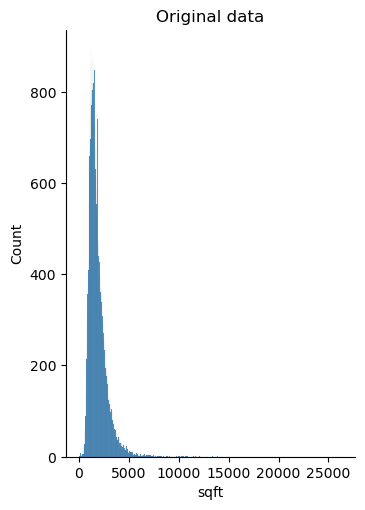

In [14]:
plt.figure(figsize=(14, 6))
sns.displot(train['sqft'], bins=1000, aspect=.75)
plt.title('Original data')
plt.show()

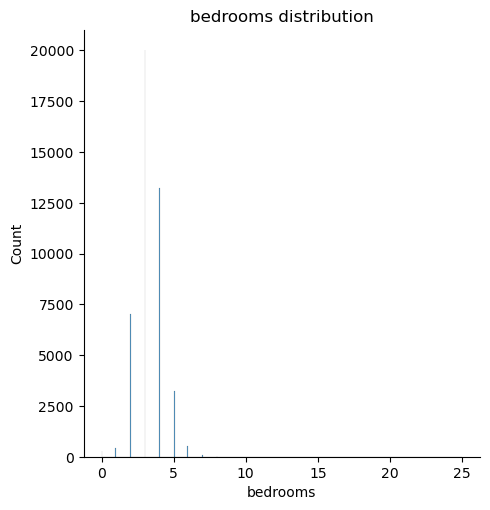

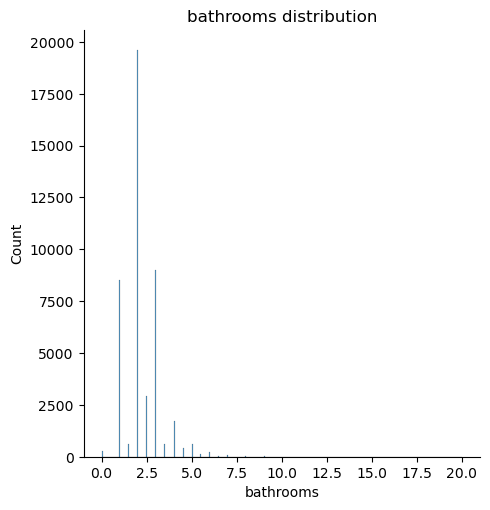

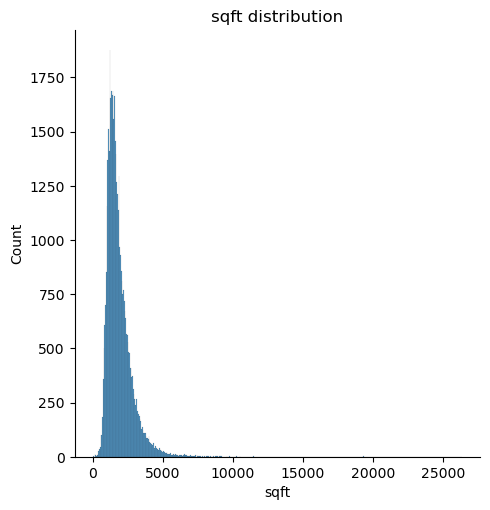

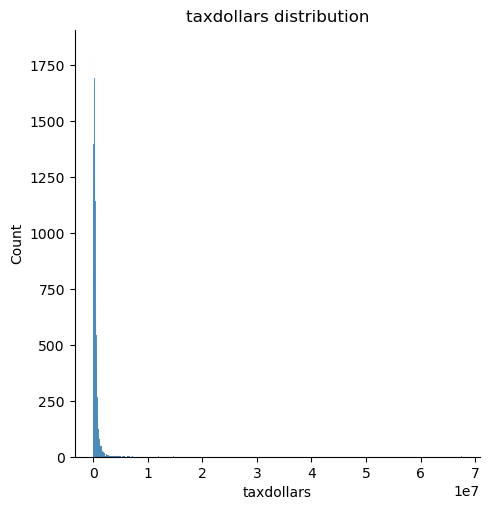

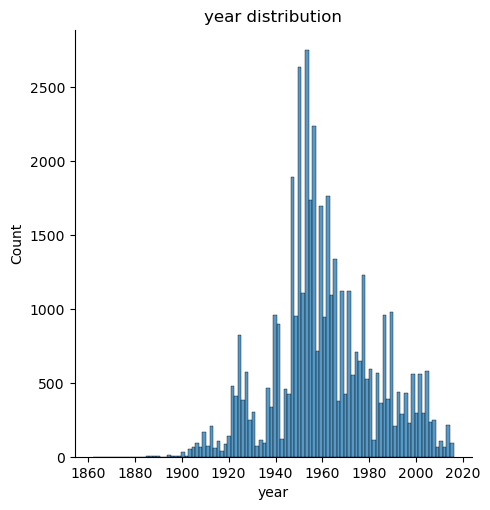

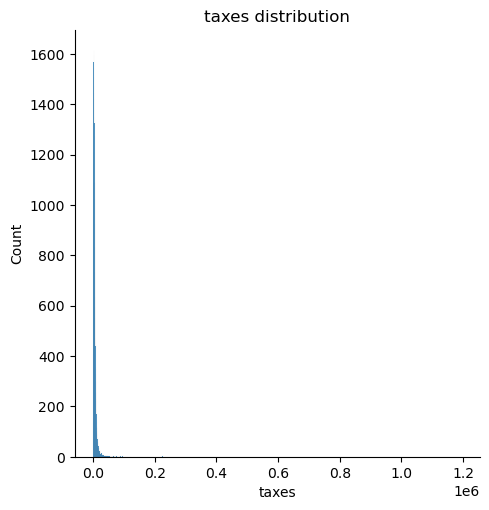

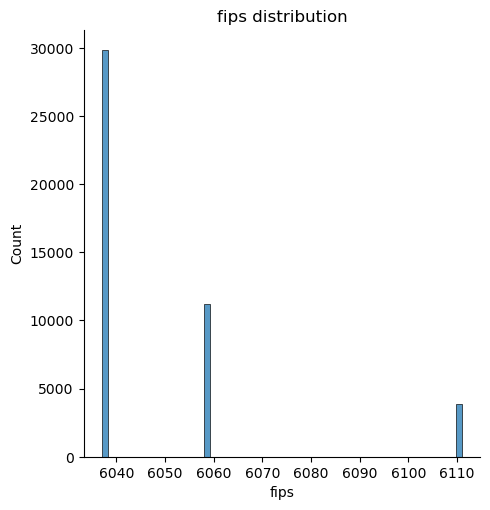

In [15]:
for col in train.columns:

    sns.displot(train[col])
    plt.title(f'{col} distribution')
    plt.show()

In [16]:
ss_scaler = StandardScaler()

In [17]:
ss_scaler.fit(train[['sqft']])

StandardScaler()

In [18]:
ss_sqft = ss_scaler.transform(train[['sqft']])

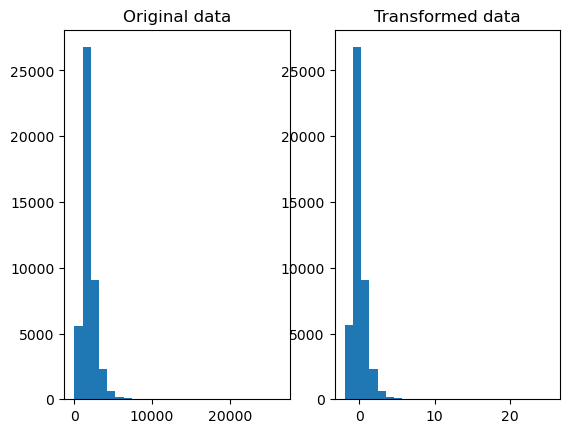

In [19]:
plt.subplot(121)
plt.hist(train['sqft'], bins=25)
plt.title('Original data')

plt.subplot(122)
plt.hist(ss_sqft, bins=25)
plt.title('Transformed data')
plt.show()

In [20]:
# 5 

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
x_train, y_train, x_validate, y_validate, x_test, y_test= w.xy_formula(train, validate, test)

In [23]:
rs_scaler = RobustScaler()

In [24]:
rs_scaler.fit(train[['sqft', 'taxdollars', 'taxes', ]])

RobustScaler()

In [25]:
more_trouble = rs_scaler.transform((train[['sqft', 'taxdollars', 'taxes', ]]))

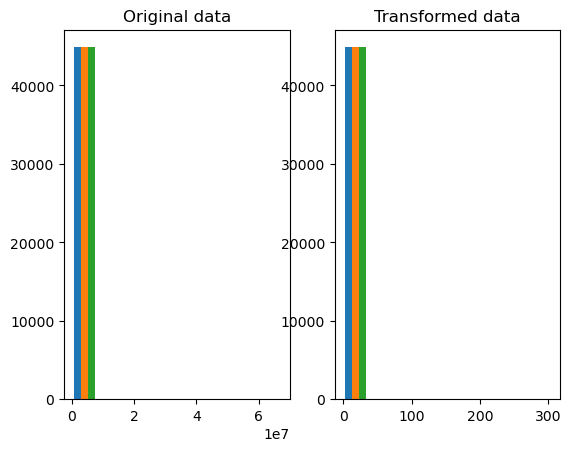

In [26]:
plt.subplot(121)
plt.hist(train[['sqft', 'taxdollars', 'taxes']], bins=8)
plt.title('Original data')

plt.subplot(122)
plt.hist(more_trouble, bins=8)
plt.title('Transformed data')
plt.show()

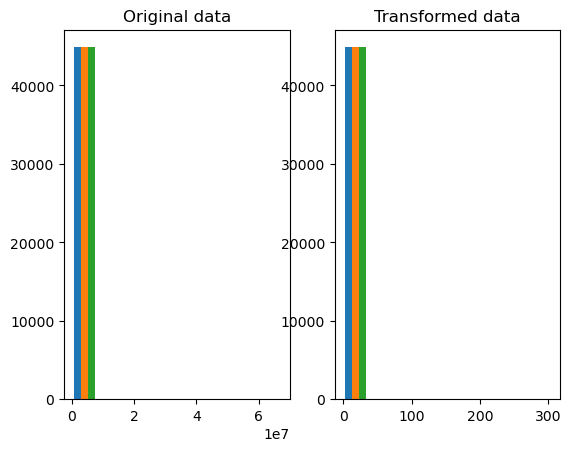

In [27]:
w.rs_formula(train)